# Likelihood

## Definition
Likelihood is a statistical term that refers to the probability of observing the data given a specific statistical model and its parameters. It measures how well a particular model explains the observed data.

### Mathematical Representation
For a set of data \(X\) and a parameterized model with parameters \(\theta\), the likelihood function \(L(\theta | X)\) is defined as:

$$
L(\theta | X) = P(X | \theta)
$$

Where:
- \(P(X | \theta)\) is the probability of the observed data \(X\) given the parameters \(\theta\).

### Key Concepts

1. **Parameter Estimation**: 
   - In statistical inference, likelihood is used to estimate the parameters of a model by maximizing the likelihood function. This method is known as Maximum Likelihood Estimation (MLE).

2. **Likelihood Function**: 
   - The likelihood function is not a probability distribution itself; rather, it is a function of the parameters given the observed data. It can take any non-negative value and does not sum to 1.

3. **Log-Likelihood**: 
   - The logarithm of the likelihood function, known as the log-likelihood, is often used for convenience, especially when dealing with products of probabilities. It transforms the product of probabilities into a sum, making calculations simpler.

   $$
   \ell(\theta | X) = \log(L(\theta | X)) = \sum_{i=1}^{n} \log(P(x_i | \theta))
   $$

   Where \(x_i\) are individual data points and \(n\) is the total number of observations.

### Example

Consider a simple example where we have a dataset of binary outcomes (success/failure), and we want to model the probability of success using a Bernoulli distribution with parameter \(p\):

1. **Data**: Let’s say we have observed 3 successes and 2 failures in 5 trials.

2. **Likelihood Function**: The likelihood function for the Bernoulli distribution is given by:

   $$
   L(p | X) = p^k (1-p)^{n-k}
   $$

   Where:
   - \(k\) is the number of successes (3),
   - \(n\) is the total number of trials (5).

   Thus, for our data:

   $$
   L(p | X) = p^3 (1-p)^2
   $$

3. **Maximizing Likelihood**: We can find the value of \(p\) that maximizes this likelihood function using calculus or numerical optimization techniques.

### Applications of Likelihood

- **Parameter Estimation**: Likelihood is extensively used in estimating parameters of statistical models.
- **Model Comparison**: The likelihood ratio test is used for hypothesis testing to compare the goodness of fit of two models.
- **Bayesian Inference**: In Bayesian statistics, likelihood plays a crucial role in updating prior beliefs with observed data to form posterior distributions.

### Conclusion
Likelihood is a fundamental concept in statistics and is widely used for model fitting, parameter estimation, and hypothesis testing. Its application spans various fields, including machine learning, bioinformatics, and econometrics.


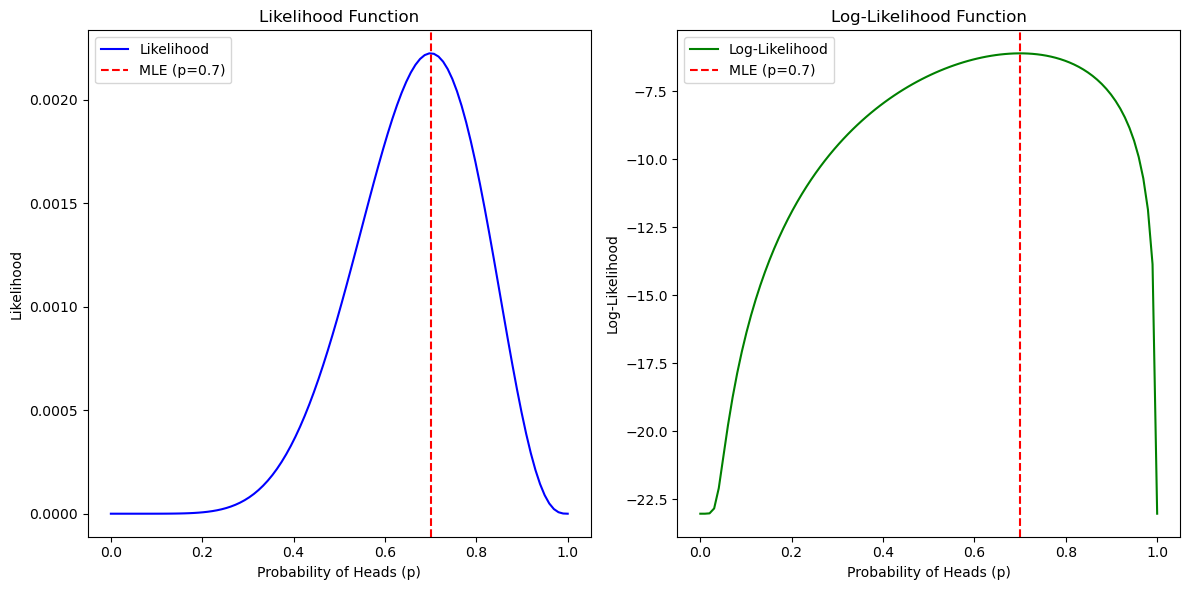

In [1]:
import torch
import matplotlib.pyplot as plt

# Define the likelihood function
def likelihood(p, k=7, n=10):
    return (p ** k) * ((1 - p) ** (n - k))

# Generate values of p
p_values = torch.linspace(0, 1, 100)
likelihood_values = likelihood(p_values)

# Calculate log-likelihood
log_likelihood_values = torch.log(likelihood_values + 1e-10)  # Add small value to avoid log(0)

# Plotting the likelihood and log-likelihood
plt.figure(figsize=(12, 6))

# Likelihood plot
plt.subplot(1, 2, 1)
plt.plot(p_values.numpy(), likelihood_values.numpy(), label='Likelihood', color='blue')
plt.title('Likelihood Function')
plt.xlabel('Probability of Heads (p)')
plt.ylabel('Likelihood')
plt.axvline(x=0.7, color='red', linestyle='--', label='MLE (p=0.7)')
plt.legend()

# Log-likelihood plot
plt.subplot(1, 2, 2)
plt.plot(p_values.numpy(), log_likelihood_values.numpy(), label='Log-Likelihood', color='green')
plt.title('Log-Likelihood Function')
plt.xlabel('Probability of Heads (p)')
plt.ylabel('Log-Likelihood')
plt.axvline(x=0.7, color='red', linestyle='--', label='MLE (p=0.7)')
plt.legend()

plt.tight_layout()
plt.show()


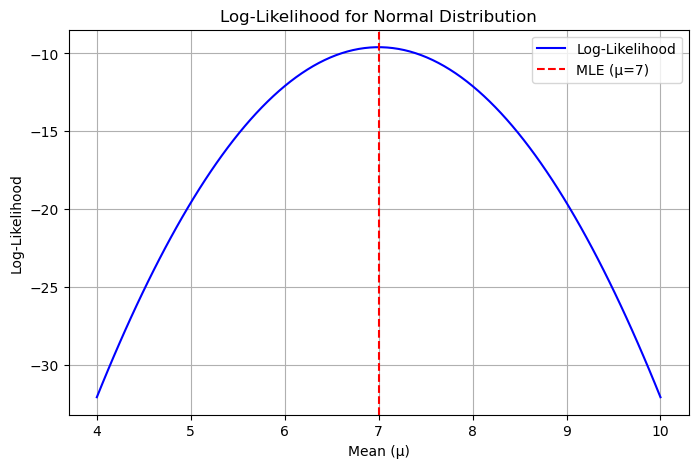

In [4]:
import torch
import matplotlib.pyplot as plt

# Observed data points
X = torch.tensor([5.0, 6.0, 7.0, 8.0, 9.0])
n = len(X)

# Fixed variance
sigma_squared = 1.0

# Define the log-likelihood function for a normal distribution
def log_likelihood(mu, sigma_squared, data):
    n = data.size(0)
    # Convert constants to tensors to avoid TypeError
    log2pi = torch.log(torch.tensor(2 * torch.pi))  # log(2π)
    log_sigma_squared = torch.log(torch.tensor(sigma_squared))  # log(σ²)
    
    return -n / 2 * log2pi - n / 2 * log_sigma_squared - \
           (1 / (2 * sigma_squared)) * torch.sum((data - mu) ** 2)

# Generate values of mu
mu_values = torch.linspace(4, 10, 100)
log_likelihood_values = [log_likelihood(mu, sigma_squared, X) for mu in mu_values]

# Plotting the log-likelihood
plt.figure(figsize=(8, 5))
plt.plot(mu_values.numpy(), log_likelihood_values, label='Log-Likelihood', color='blue')
plt.title('Log-Likelihood for Normal Distribution')
plt.xlabel('Mean (μ)')
plt.ylabel('Log-Likelihood')
plt.axvline(x=X.mean(), color='red', linestyle='--', label='MLE (μ=7)')
plt.legend()
plt.grid()
plt.show()


# Understanding the Likelihood Function

The expression you provided represents the likelihood function in the context of statistical modeling, specifically for a set of independent observations. Let's break down the notation and the meaning of this expression:

## Notation Breakdown

- **\(L(\theta | X)\)**: This denotes the likelihood function, which is a function of the parameter \(\theta\) given the observed data \(X\). The vertical bar \(|\) indicates that we are looking at the likelihood of \(X\) under the parameter \(\theta\).

- **\(\prod\)**: This symbol represents the product operator. It is used to multiply a sequence of terms together.

- **\(P(x_i | \theta)\)**: This represents the probability of observing the data point \(x_i\) given the parameter \(\theta\). Here, \(P\) is the probability mass function (PMF) if \(x_i\) is a discrete variable or the probability density function (PDF) if \(x_i\) is a continuous variable.

- **\(i = 1\) to \(n\)**: This indicates that the product is taken over all observations from \(i = 1\) to \(n\), where \(n\) is the total number of observations.

## Complete Expression

Putting this all together, the expression:

$$
L(\theta | X) = \prod_{i=1}^{n} P(x_i | \theta)
$$

means:

1. **Likelihood of the Data**: The likelihood function \(L(\theta | X)\) gives the likelihood of observing the entire dataset \(X\) as a function of the parameter \(\theta\).

2. **Product of Probabilities**: Since we assume that the observations \(x_1, x_2, \ldots, x_n\) are independent, the likelihood is computed as the product of the individual probabilities \(P(x_i | \theta)\) for each observation \(x_i\) given the parameter \(\theta\). 

## Example

To illustrate, consider a simple example:

- Suppose we have a dataset consisting of the heights of 5 individuals: \(X = \{h_1, h_2, h_3, h_4, h_5\}\).
- Assume the heights are normally distributed with unknown mean \(\mu\) and variance \(\sigma^2\).

The likelihood function would look like this:

$$
L(\mu, \sigma^2 | X) = \prod_{i=1}^{5} P(h_i | \mu, \sigma^2)
$$

This indicates that to compute the likelihood of observing the heights given the parameters \(\mu\) and \(\sigma^2\), we multiply the probabilities of each height being generated from the normal distribution defined by those parameters. 

## Conclusion

In summary, the expression 

$$
L(\theta | X) = \prod_{i=1}^{n} P(x_i | \theta)
$$ 

captures the core idea of likelihood in statistical modeling, emphasizing the product of probabilities across independent observations to evaluate how well a set of parameters explains the observed data.


# Understanding the Likelihood Function

The concept of likelihood is central to statistics and is often used in parameter estimation and model fitting. Below, I provide a detailed derivation of likelihood, explaining its foundations and mathematical formulation.

### Definition of Likelihood

The likelihood function measures how well a statistical model explains the observed data given specific parameter values. For a set of observed data \(X = \{x_1, x_2, ..., x_n\}\) and a statistical model parameterized by \(\theta\), the likelihood \(L(\theta | X)\) is defined as:

$$
L(\theta | X) = P(X | \theta)
$$

Where:
- \(P(X | \theta)\) is the probability of observing the data \(X\) given the parameters \(\theta\).

### Likelihood for Different Data Types

#### 1. Discrete Data

For discrete random variables, the likelihood can be formulated based on the probability mass function (PMF). If we have a set of independent observations \(X\) from a discrete distribution characterized by the parameter \(\theta\), the likelihood is:

$$
L(\theta | X) = \prod_{i=1}^{n} P(x_i | \theta)
$$

Here, \(P(x_i | \theta)\) is the PMF evaluated at each observed data point \(x_i\).

#### 2. Continuous Data

For continuous random variables, we use the probability density function (PDF). Given independent observations \(X\) from a continuous distribution, the likelihood is:

$$
L(\theta | X) = \prod_{i=1}^{n} f(x_i | \theta)
$$

Where \(f(x_i | \theta)\) is the PDF evaluated at each observed data point \(x_i\).

### Log-Likelihood

Since the likelihood can be a very small number, especially for large datasets, it is often more convenient to work with the logarithm of the likelihood, known as the log-likelihood. The log-likelihood is defined as:

$$
\ell(\theta | X) = \log(L(\theta | X))
$$

For independent observations, the log-likelihood becomes:

$$
\ell(\theta | X) = \sum_{i=1}^{n} \log(P(x_i | \theta)) \quad \text{(for discrete data)}
$$

or

$$
\ell(\theta | X) = \sum_{i=1}^{n} \log(f(x_i | \theta)) \quad \text{(for continuous data)}
$$

### Maximum Likelihood Estimation (MLE)

The goal of MLE is to find the parameter values \(\hat{\theta}\) that maximize the likelihood function. This is done by solving the following optimization problem:

$$
\hat{\theta} = \arg\max_{\theta} L(\theta | X) \quad \text{(or equivalently)} \quad \hat{\theta} = \arg\max_{\theta} \ell(\theta | X)
$$

To find the maximum likelihood estimates, we can take the derivative of the log-likelihood function with respect to \(\theta\) and set it to zero:

$$
\frac{d\ell(\theta | X)}{d\theta} = 0
$$

This equation can be solved to find the parameter estimates.

### Example: Likelihood for a Normal Distribution

Consider a simple example where we have \(n\) independent observations \(X = \{x_1, x_2, ..., x_n\}\) from a normal distribution \(N(\mu, \sigma^2)\) with unknown mean \(\mu\) and variance \(\sigma^2\).

1. **Probability Density Function**:

   The PDF of the normal distribution is given by:

   $$
   f(x | \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right)
   $$

2. **Likelihood Function**:

   The likelihood function for \(n\) independent observations is:

   $$
   L(\mu, \sigma^2 | X) = \prod_{i=1}^{n} f(x_i | \mu, \sigma^2) = \prod_{i=1}^{n} \left( \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x_i - \mu)^2}{2\sigma^2}\right) \right)
   $$

3. **Log-Likelihood Function**:

   Taking the log of the likelihood function, we get:

   $$
   \ell(\mu, \sigma^2 | X) = \sum_{i=1}^{n} \left( -\frac{1}{2} \log(2\pi\sigma^2) - \frac{(x_i - \mu)^2}{2\sigma^2} \right)
   $$

   Simplifying, we have:

   $$
   \ell(\mu, \sigma^2 | X) = -\frac{n}{2} \log(2\pi) - \frac{n}{2} \log(\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^{n} (x_i - \mu)^2
   $$

4. **Maximizing the Log-Likelihood**:

   To find the maximum likelihood estimates of \(\mu\) and \(\sigma^2\), we can take the derivative of the log-likelihood with respect to these parameters and set them to zero:

   - For \(\mu\):

   $$
   \frac{\partial \ell}{\partial \mu} = \frac{1}{\sigma^2} \sum_{i=1}^{n} (x_i - \mu) = 0
   $$

   - For \(\sigma^2\):

   $$
   \frac{\partial \ell}{\partial \sigma^2} = -\frac{n}{2\sigma^2} + \frac{1}{2\sigma^4} \sum_{i=1}^{n} (x_i - \mu)^2 = 0
   $$

   Solving these equations will yield the MLE estimates for \(\mu\) and \(\sigma^2\).

### Conclusion

The likelihood function is a powerful tool for parameter estimation in statistics and machine learning. By understanding its formulation and derivation, practitioners can apply these concepts effectively in various contexts, such as maximum likelihood estimation, model fitting, and evaluation.


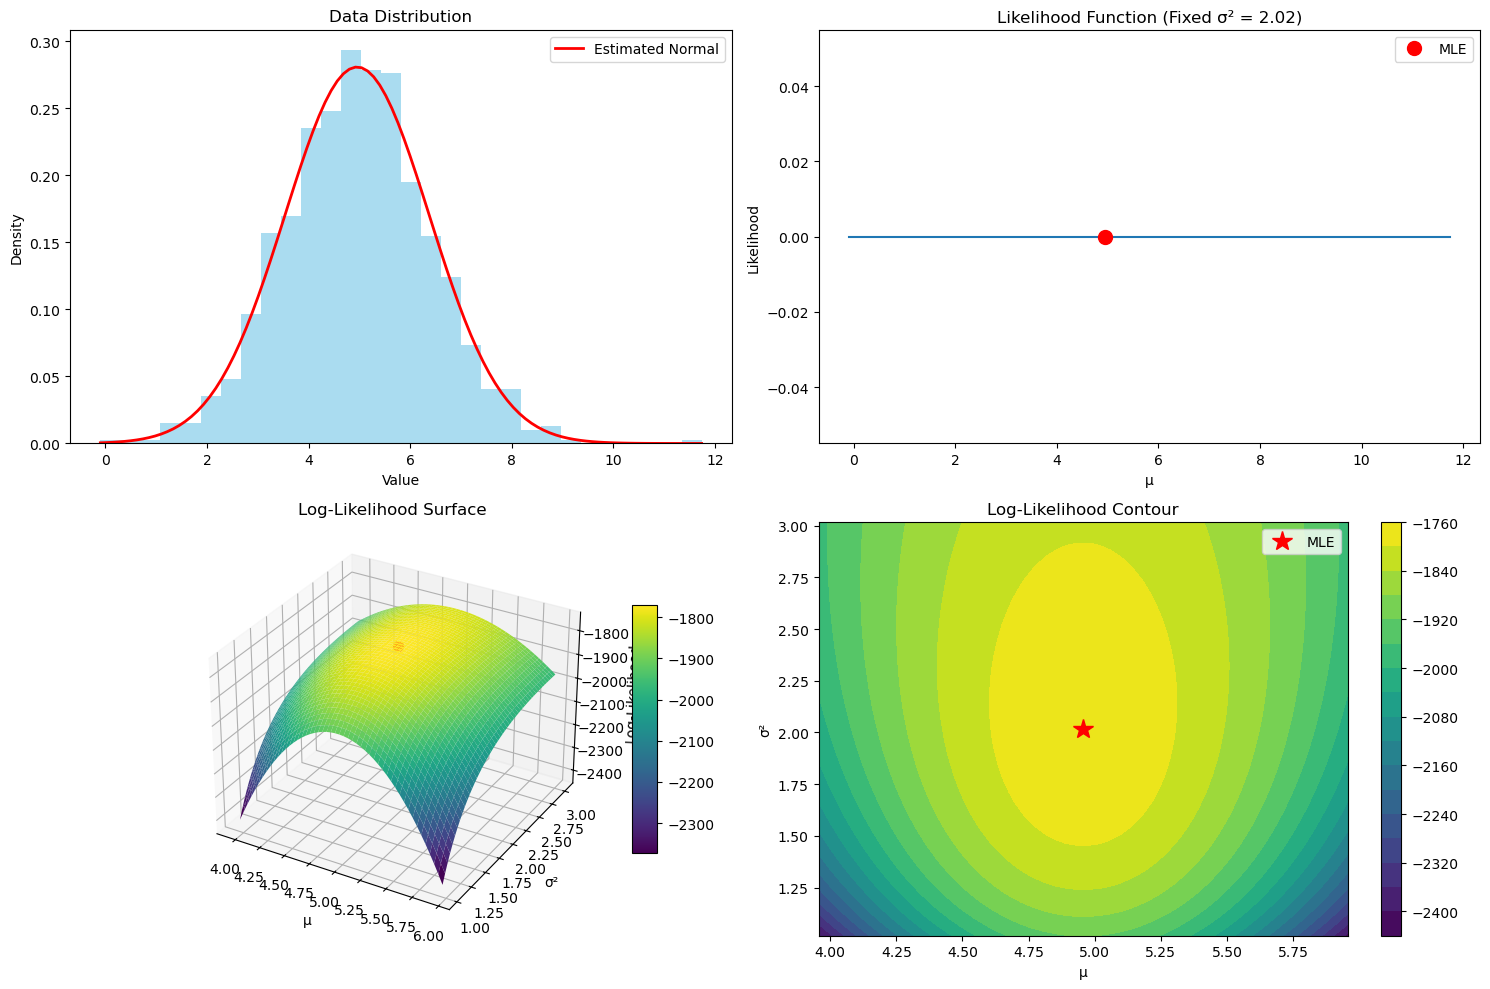

Estimated Mean (μ): 4.9561
Estimated Variance (σ²): 2.0172


In [15]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class LikelihoodEstimator:
    def __init__(self, data):
        self.data = data
        self.n = torch.tensor(data.size(0))

    def likelihood(self, mu, sigma2):
        mu = torch.tensor(mu) if not isinstance(mu, torch.Tensor) else mu
        sigma2 = torch.tensor(sigma2) if not isinstance(sigma2, torch.Tensor) else sigma2
        likelihood = (1 / torch.sqrt(2 * torch.pi * sigma2)) * \
                     torch.exp(-((self.data - mu) ** 2) / (2 * sigma2))
        return torch.prod(likelihood)

    def log_likelihood(self, mu, sigma2):
        mu = torch.tensor(mu) if not isinstance(mu, torch.Tensor) else mu
        sigma2 = torch.tensor(sigma2) if not isinstance(sigma2, torch.Tensor) else sigma2
        two_pi = torch.tensor(2 * torch.pi)
        log_likelihood = -0.5 * self.n * torch.log(two_pi) - \
                         0.5 * self.n * torch.log(sigma2) - \
                         (1 / (2 * sigma2)) * torch.sum((self.data - mu) ** 2)
        return log_likelihood

    def mle_estimate(self):
        mu_hat = torch.mean(self.data)
        sigma2_hat = torch.var(self.data, unbiased=False)
        return mu_hat, sigma2_hat

    def plot_analysis(self):
        mu_hat, sigma2_hat = self.mle_estimate()
        
        fig = plt.figure(figsize=(15, 10))
        
        # Plot 1: Data Distribution
        ax1 = fig.add_subplot(221)
        ax1.hist(self.data.numpy(), bins=30, density=True, alpha=0.7, color='skyblue')
        ax1.set_title("Data Distribution")
        ax1.set_xlabel("Value")
        ax1.set_ylabel("Density")
        
        x = np.linspace(self.data.min().item(), self.data.max().item(), 100)
        y = 1 / (np.sqrt(2 * np.pi * sigma2_hat.item())) * \
            np.exp(-(x - mu_hat.item())**2 / (2 * sigma2_hat.item()))
        ax1.plot(x, y, 'r-', lw=2, label='Estimated Normal')
        ax1.legend()

        # Plot 2: Likelihood Function (Fixed σ²)
        ax2 = fig.add_subplot(222)
        mu_range = np.linspace(self.data.min().item(), self.data.max().item(), 200)
        likelihood_values = [self.likelihood(mu, sigma2_hat).item() for mu in mu_range]
        ax2.plot(mu_range, likelihood_values)
        ax2.set_title(f"Likelihood Function (Fixed σ² = {sigma2_hat.item():.2f})")
        ax2.set_xlabel("μ")
        ax2.set_ylabel("Likelihood")
        ax2.plot([mu_hat], [self.likelihood(mu_hat, sigma2_hat)], 'ro', markersize=10, label='MLE')
        ax2.legend()

        # Plot 3: Log-Likelihood Surface
        ax3 = fig.add_subplot(223, projection='3d')
        mu_range = np.linspace(mu_hat.item() - 1, mu_hat.item() + 1, 50)
        sigma2_range = np.linspace(max(0.1, sigma2_hat.item() - 1), sigma2_hat.item() + 1, 50)
        mu_grid, sigma2_grid = np.meshgrid(mu_range, sigma2_range)
        log_likelihood_values = np.array([[self.log_likelihood(mu, sigma2).item() 
                                           for mu in mu_range] 
                                          for sigma2 in sigma2_range])
        surf = ax3.plot_surface(mu_grid, sigma2_grid, log_likelihood_values, cmap='viridis')
        ax3.set_xlabel('μ')
        ax3.set_ylabel('σ²')
        ax3.set_zlabel('Log-Likelihood')
        ax3.set_title('Log-Likelihood Surface')
        ax3.scatter([mu_hat], [sigma2_hat], [self.log_likelihood(mu_hat, sigma2_hat)], 
                    color='red', s=50, label='MLE')
        fig.colorbar(surf, ax=ax3, shrink=0.6, aspect=10)

        # Plot 4: Contour Plot of Log-Likelihood
        ax4 = fig.add_subplot(224)
        contour = ax4.contourf(mu_grid, sigma2_grid, log_likelihood_values, levels=20, cmap='viridis')
        ax4.set_title('Log-Likelihood Contour')
        ax4.set_xlabel('μ')
        ax4.set_ylabel('σ²')
        ax4.plot(mu_hat, sigma2_hat, 'r*', markersize=15, label='MLE')
        ax4.legend()
        fig.colorbar(contour, ax=ax4)

        plt.tight_layout()
        plt.show()

        print(f"Estimated Mean (μ): {mu_hat.item():.4f}")
        print(f"Estimated Variance (σ²): {sigma2_hat.item():.4f}")

# Example usage
if __name__ == "__main__":
    # Generate sample data
    true_mu = 5.0
    true_sigma2 = 2.0
    sample_size = 1000
    data = torch.normal(mean=true_mu, std=torch.sqrt(torch.tensor(true_sigma2)), size=(sample_size,))

    # Initialize estimator and plot analysis
    estimator = LikelihoodEstimator(data)
    estimator.plot_analysis()

$$ - \text{Deriving log-likelihood estimates involves taking the natural logarithm of the likelihood function for various statistical distributions. Here’s a detailed derivation for several common distributions, including the Bernoulli, Binomial, Normal, and Poisson distributions.} $$

### 1. Bernoulli Distribution

#### Likelihood Function

$$
P(X_i = x_i | p) = p^{x_i} (1 - p)^{1 - x_i}
$$

For \(n\) independent observations \(X = (x_1, x_2, \ldots, x_n)\), the likelihood function is:

$$
L(p | X) = \prod_{i=1}^{n} p^{x_i} (1 - p)^{1 - x_i}
$$

#### Log-Likelihood Function

Taking the natural logarithm:

$$
\begin{align*}
\ell(p | X) &= \log L(p | X) \\
&= \sum_{i=1}^{n} \log\left(p^{x_i} (1 - p)^{1 - x_i}\right) \\
&= \sum_{i=1}^{n} \left(x_i \log p + (1 - x_i) \log(1 - p)\right) \\
&= \left(\sum_{i=1}^{n} x_i\right) \log p + \left(n - \sum_{i=1}^{n} x_i\right) \log(1 - p)
\end{align*}
$$

Let \(k = \sum_{i=1}^{n} x_i\) (the number of successes). Thus, the log-likelihood becomes:

$$
\ell(p | X) = k \log p + (n - k) \log(1 - p)
$$

### 2. Binomial Distribution

#### Likelihood Function

For a Binomial random variable \(X\) with parameters \(n\) (number of trials) and \(p\) (success probability):

$$
P(X = k | n, p) = \binom{n}{k} p^k (1 - p)^{n - k}
$$

The likelihood function for \(n\) independent observations is:

$$
L(p | X) = \prod_{j=1}^{m} \binom{n}{k_j} p^{k_j} (1 - p)^{n - k_j}
$$

#### Log-Likelihood Function

Taking the natural logarithm:

$$
\begin{align*}
\ell(p | X) &= \log L(p | X) \\
&= \sum_{j=1}^{m} \log\left(\binom{n}{k_j}\right) + \sum_{j=1}^{m} \left(k_j \log p + (n - k_j) \log(1 - p)\right) \\
&= \sum_{j=1}^{m} \log\left(\binom{n}{k_j}\right) + \left(\sum_{j=1}^{m} k_j\right) \log p + \left(mn - \sum_{j=1}^{m} k_j\right) \log(1 - p)
\end{align*}
$$

### 3. Normal Distribution

#### Likelihood Function

For a Normal random variable \(X \sim N(\mu, \sigma^2)\):

$$
P(X | \mu, \sigma^2) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{(x - \mu)^2}{2 \sigma^2}\right)
$$

The likelihood for \(n\) observations is:

$$
L(\mu, \sigma^2 | X) = \prod_{i=1}^{n} \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{(x_i - \mu)^2}{2 \sigma^2}\right)
$$

#### Log-Likelihood Function

Taking the logarithm:

$$
\begin{align*}
\ell(\mu, \sigma^2 | X) &= \log L(\mu, \sigma^2 | X) \\
&= -\frac{n}{2} \log(2 \pi) - \frac{n}{2} \log(\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^{n} (x_i - \mu)^2
\end{align*}
$$

### 4. Poisson Distribution

#### Likelihood Function

For a Poisson random variable \(X \sim \text{Poisson}(\lambda)\):

$$
P(X = k | \lambda) = \frac{\lambda^k e^{-\lambda}}{k!}
$$

For \(n\) independent observations:

$$
L(\lambda | X) = \prod_{i=1}^{n} \frac{\lambda^{x_i} e^{-\lambda}}{x_i!}
$$

#### Log-Likelihood Function

Taking the logarithm:

$$
\begin{align*}
\ell(\lambda | X) &= \log L(\lambda | X) \\
&= \sum_{i=1}^{n} \left(x_i \log \lambda - \lambda - \log(x_i!)\right) \\
&= \left(\sum_{i=1}^{n} x_i\right) \log \lambda - n\lambda - \sum_{i=1}^{n} \log(x_i!)
\end{align*}
$$

### Summary of Log-Likelihoods

1. **Bernoulli**: 
   $$
   \ell(p | X) = k \log p + (n - k) \log(1 - p)
   $$

2. **Binomial**: 
   $$
   \ell(p | X) = \sum_{j=1}^{m} \log\left(\binom{n}{k_j}\right) + k \log p + (mn - k) \log(1 - p)
   $$

3. **Normal**: 
   $$
   \ell(\mu, \sigma^2 | X) = -\frac{n}{2} \log(2 \pi) - \frac{n}{2} \log(\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^{n} (x_i - \mu)^2
   $$

4. **Poisson**: 
   $$
   \ell(\lambda | X) = \left(\sum_{i=1}^{n} x_i\right) \log \lambda - n\lambda - \sum_{i=1}^{n} \log(x_i!)
   $$

$$ - \text{These log-likelihood functions are fundamental in statistical inference, as they allow us to estimate parameters using methods like Maximum Likelihood Estimation (MLE).} $$


# Applications of the Likelihood Function

## 1. Maximum Likelihood Estimation (MLE)

**Concept:**  
MLE aims to find the parameters that maximize the likelihood of the observed data under a statistical model.

**Derivation:**

1. **Define the likelihood function:** Given a statistical model with parameter \(\theta\) and independent observations \(X = (X_1, X_2, \ldots, X_n)\), the likelihood function \(L(\theta | X)\) is defined as:
   $$
   L(\theta | X) = P(X | \theta) = \prod_{i=1}^{n} P(X_i | \theta)
   $$

2. **Log-likelihood:** It’s often easier to maximize the log of the likelihood:
   $$
   \ell(\theta | X) = \log L(\theta | X) = \sum_{i=1}^{n} \log P(X_i | \theta)
   $$

3. **Finding MLE:** To find the MLE, take the derivative of the log-likelihood with respect to \(\theta\) and set it to zero:
   $$
   \frac{d\ell(\theta | X)}{d\theta} = 0
   $$
   Solve this equation to find the value of \(\theta\) that maximizes the likelihood.

---

## 2. Likelihood Ratio Test (LRT)

**Concept:**  
The LRT compares two nested models to determine if the more complex model significantly improves fit.

**Derivation:**

1. **Define likelihoods for two models:** Let \(L_0 = L(\theta_0 | X)\) be the likelihood of the null model and \(L_1 = L(\hat{\theta} | X)\) be the likelihood of the alternative model.

2. **Likelihood ratio:** The test statistic is given by:
   $$
   \Lambda = \frac{L_0}{L_1}
   $$
   If \(\Lambda\) is small, it indicates that the alternative model provides a significantly better fit.

3. **Distribution:** Under certain regularity conditions, \(-2 \log \Lambda\) follows a chi-squared distribution with degrees of freedom equal to the difference in the number of parameters between the two models.

---

## 3. Generative Models in Deep Learning (Variational Autoencoders)

**Concept:**  
VAEs use a probabilistic approach to model complex data distributions.

**Derivation:**

1. **Latent variable model:** Assume that data \(X\) is generated from latent variables \(Z\):
   $$
   P(X) = \int P(X | Z) P(Z) dZ
   $$

2. **Variational inference:** To compute \(P(X)\), we introduce an approximate posterior \(Q(Z | X)\) and optimize the variational lower bound:
   $$
   \mathcal{L}(\theta, \phi; X) = \mathbb{E}_{q_\phi(z|X)}\left[\log p_\theta(X|z)\right] - D_{KL}(q_\phi(z|X) || p(z))
   $$
   Here, \(\mathbb{E}\) is the expectation with respect to \(q_\phi\), and \(D_{KL}\) is the Kullback-Leibler divergence measuring the difference between the approximate and true posterior.

---

## 4. Neural Networks

**Concept:**  
Neural networks use likelihood functions to optimize model parameters during training.

**Derivation:**

1. **Define the likelihood:** For a classification task with output \(y_i\) and input \(X_i\):
   $$
   L(\theta | X, y) = \prod_{i=1}^{n} P(y_i | X_i; \theta)
   $$

2. **Log-likelihood:**
   $$
   \ell(\theta | X, y) = \sum_{i=1}^{n} \log P(y_i | X_i; \theta)
   $$

3. **Gradient ascent:** Update the parameters using gradient ascent on the log-likelihood:
   $$
   \theta \leftarrow \theta + \eta \frac{d\ell(\theta | X, y)}{d\theta}
   $$
   Where \(\eta\) is the learning rate.

---

## 5. Reinforcement Learning

**Concept:**  
In reinforcement learning, the objective is to optimize policies to maximize expected rewards.

**Derivation:**

1. **Define expected return:** The expected return \(J(\theta)\) for policy \(\pi_\theta\) is given by:
   $$
   J(\theta) = \mathbb{E}_{\tau \sim \pi_\theta}\left[ \sum_{t=0}^{T} r_t \right]
   $$
   Where \(\tau\) is a trajectory of states and actions.

2. **Policy gradient:** The policy gradient theorem provides a way to compute the gradient of \(J(\theta)\):
   $$
   \nabla J(\theta) = \mathbb{E}_{\tau \sim \pi_\theta}\left[ \sum_{t=0}^{T} \nabla \log \pi_\theta(a_t | s_t) Q^\pi(s_t, a_t) \right]
   $$
   Where \(Q^\pi\) is the action-value function.

---

## 6. Gaussian Mixture Models (GMMs)

**Concept:**  
GMMs model a mixture of Gaussian distributions to fit data.

**Derivation:**

1. **Define the mixture model:** The likelihood function for a GMM is:
   $$
   L(\mu, \sigma^2, \pi | X) = \prod_{i=1}^{n} \sum_{k=1}^{K} \pi_k \mathcal{N}(x_i | \mu_k, \sigma^2_k)
   $$
   Where \(\pi_k\) are the mixture weights, and \(\mathcal{N}\) is the normal distribution.

2. **Maximize log-likelihood:**
   $$
   \ell(\mu, \sigma^2, \pi | X) = \sum_{i=1}^{n} \log\left(\sum_{k=1}^{K} \pi_k \mathcal{N}(x_i | \mu_k, \sigma^2_k)\right)
   $$

3. **Expectation-Maximization (EM):** Use the EM algorithm to maximize the log-likelihood iteratively:
   - **E-step:** Compute responsibilities:
     $$
     r_{ik} = \frac{\pi_k \mathcal{N}(x_i | \mu_k, \sigma^2_k)}{\sum_{j=1}^{K} \pi_j \mathcal{N}(x_i | \mu_j, \sigma^2_j)}
     $$
   - **M-step:** Update parameters using the responsibilities.

---

## 7. Hidden Markov Models (HMMs)

**Concept:**  
HMMs use likelihood functions to estimate parameters based on observable data.

**Derivation:**

1. **Define the model:** The likelihood of an observation sequence \(O\) given the model parameters \(\lambda\) is:
   $$
   L(\lambda | O) = P(O | \lambda) = \sum_{Q} P(O | Q, \lambda) P(Q | \lambda)
   $$

2. **Use the Forward Algorithm:** Calculate \(P(O | \lambda)\) efficiently:
   - Define \(\alpha_t(i)\) as the probability of being in state \(i\) after observing the first \(t\) observations:
   $$
   \alpha_t(i) = \sum_{j} \alpha_{t-1}(j) a_{ji} b_i(O_t)
   $$
   Where \(a_{ji}\) is the transition probability and \(b_i(O_t)\) is the emission probability.

3. **Total probability:**
   $$
   P(O | \lambda) = \sum_{i} \alpha_T(i)
   $$

---

## 8. Time Series Analysis

**Concept:**  
Likelihood functions are used in models like ARIMA to estimate parameters.

**Derivation:**

1. **Define the model:** An ARIMA model can be represented as:
   $$
   Y_t = \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + \ldots + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \epsilon_t
   $$
   Where \(\phi\) are AR parameters, \(\theta\) are MA parameters, and \(\epsilon_t\) are white noise errors.

2. **Likelihood function:** The likelihood for \(n\) observations can be derived based on the joint distribution of the observed series:
   $$
   L(\phi, \theta | Y) = \prod_{t=1}^{n} P(Y_t | Y_{t-1}, Y_{t-2}; \phi, \theta)
   $$

3. **Log-likelihood:**
   $$
   \ell(\phi, \theta | Y) = \sum_{t=1}^{n} \log P(Y_t | Y_{t-1}, Y_{t-2}; \phi, \theta)
   $$
   Maximize this log-likelihood to estimate \(\phi\) and \(\theta\).

---

## 9. Bayesian Inference

**Concept:**  
In Bayesian statistics, the likelihood function is crucial for updating beliefs based on evidence.

**Derivation:**

1. **Bayes' theorem:** The posterior distribution is proportional to the likelihood and prior:
   $$
   P(\theta | X) \propto P(X | \theta) P(\theta)
   $$

2. **Compute the posterior:** Integrate over all possible values of \(\theta\):
   $$
   P(X) = \int P(X | \theta) P(\theta) d\theta
   $$
   Thus, the posterior can be expressed as:
   $$
   P(\theta | X) = \frac{P(X | \theta) P(\theta)}{P(X)}
   $$

---

## 10. Survival Analysis

**Concept:**  
Likelihood functions are used in survival analysis to model time-to-event data.

**Derivation:**

1. **Define survival function:** The survival function \(S(t)\) is given by:
   $$
   S(t) = P(T > t) = 1 - F(t)
   $$
   Where \(F(t)\) is the cumulative distribution function.

2. **Likelihood function:** For a set of observed survival times, the likelihood can be defined as:
   $$
   L(\beta | t) = \prod_{i=1}^{n} f(t_i; \beta)^{\delta_i} \cdot S(t_i; \beta)^{1-\delta_i}
   $$
   Where \(f(t; \beta)\) is the probability density function, and \(\delta_i\) indicates if the event was observed (1) or censored (0).

3. **Log-likelihood:** The log-likelihood is:
   $$
   \ell(\beta | t) = \sum_{i=1}^{n} \delta_i \log f(t_i; \beta) + (1 - \delta_i) \log S(t_i; \beta)
   $$

---

## Summary

The derivations above provide a detailed understanding of the likelihood function and its applications in various fields, including statistics, machine learning, and artificial intelligence. Each application is rooted in the principles of probability and optimization, showcasing how likelihood functions serve as a foundation for estimating parameters and testing hypotheses in complex models. If you need further explanations or more examples, feel free to ask!
